<a href="https://colab.research.google.com/github/AlexeyLebedev90/HelloWorld/blob/main/ML_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier as DC
from sklearn.ensemble import BaggingClassifier as BC
from sklearn.ensemble import RandomForestClassifier as RC
from sklearn.metrics import accuracy_score as acc
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score as cs
from sklearn.ensemble import GradientBoostingClassifier as GC
from xgboost import XGBClassifier as XGBS
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot
from functools import partial as pl
from sklearn.preprocessing import LabelEncoder
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK




In [2]:
link = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(link, sep=';')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


1.Оцените качество по метрике accuracy для классификаторов:

DecisionTreeClassifier

BaggingClassifier со 100 деревьями

RandomForestClassifier со 100 деревьями

Сравните результаты и напишите какой вывод можно сделать.

In [3]:
X = data[data.columns[:-1]]
y = data[data.columns[-1:]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
DC_tree = acc(y_test, DC().fit(X_train, y_train).predict(X_test))
BC_tree = acc(y_test, BC(n_estimators=100).fit(X_train, y_train).predict(X_test))
RC_tree = acc(y_test, RC(n_estimators=100).fit(X_train, y_train).predict(X_test))
print(DC_tree)
print(BC_tree)
print(RC_tree)


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.578125
0.634375
0.64375


2.Разделите выборку на обучающую и тестовую в отношении 70%/30%

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


3.Посчитайте качество на тестовой выборке по метрике accuracy для классификатора RandomForestClassifier, используя значения деревьев:
    
10, 50, 100, 200, далее с шагом 200 до 5000 деревьев.
Постройте график зависимости качества от числа деревьев.



In [6]:
tree = [10,50,100,200]
step = [i for i in range(400,5200,200)]
tree_step = tree + step
tree_step

[10,
 50,
 100,
 200,
 400,
 600,
 800,
 1000,
 1200,
 1400,
 1600,
 1800,
 2000,
 2200,
 2400,
 2600,
 2800,
 3000,
 3200,
 3400,
 3600,
 3800,
 4000,
 4200,
 4400,
 4600,
 4800,
 5000]

In [7]:
df = []
for i in tree_step:
  clf = RC(n_estimators=i)
  clf.fit(X_train, y_train)
  df_test = clf.score(X_test, y_test)
  df.append({'i':i, 'df_test':df_test})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  af

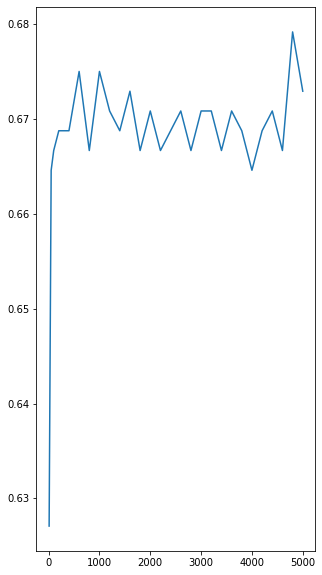

In [10]:
tree_step_df = pd.DataFrame(df)
pyplot.figure (figsize=(5, 10))
pyplot.plot(tree_step_df.i, tree_step_df.df_test)
pyplot.show()

4.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек sklearn и xgboost. Сравните значение метрики accuracy по cross_val_score

In [11]:
cs(GC(), X, y, scoring='accuracy', cv=5).mean()


0.5615967868338558

In [12]:
cs(XGBS(), X, y, scoring='accuracy', cv=5).mean()

0.5690987460815047

5.Подберите оптимальные параметры этих алгоритмов с помощью GridSearchCV(cv=3).
Сравните значение метрики accuracy и скорость работы. Выведите лучшие параметры алгоритмов.

In [13]:
params = {'learning_rate' : [0.01, 0.02, 0.1],
'n_estimators' : [1, 2, 3],
'max_depth' : range(1,5)}


In [14]:
GS = GridSearchCV(GC(), params, cv=3)
GS.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.02, 0.1],
                         'max_depth': range(1, 5), 'n_estimators': [1, 2, 3]})

In [15]:
GS.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 3}

In [16]:
acc(y_test, GS.predict(X_test))


0.5708333333333333

In [17]:
XS = GridSearchCV(XGBS(), params, cv=3)
XS.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=XGBClassifier(),
             param_grid={'learning_rate': [0.01, 0.02, 0.1],
                         'max_depth': range(1, 5), 'n_estimators': [1, 2, 3]})

In [ ]:
XS.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 3}

Вывод: xgboost работает быстрей

6.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек lightgbm и catboost. Сравните значение метрики accuracy по cross_val_score по всем четырем реализациям.

In [18]:
cs(LGBMClassifier(), X, y, scoring='accuracy').mean()


0.5541026645768025

In [21]:
!pip install catboost

from catboost import CatBoostClassifier

cs(CatBoostClassifier(), X, y, scoring='accuracy').mean()

Выходные данные были обрезаны до нескольких последних строк (5000).
4:	learn: 1.3986323	total: 79.6ms	remaining: 15.8s
5:	learn: 1.3493535	total: 85.8ms	remaining: 14.2s
6:	learn: 1.3018142	total: 91.9ms	remaining: 13s
7:	learn: 1.2635278	total: 97.9ms	remaining: 12.1s
8:	learn: 1.2288350	total: 104ms	remaining: 11.5s
9:	learn: 1.1965165	total: 111ms	remaining: 11s
10:	learn: 1.1667856	total: 117ms	remaining: 10.5s
11:	learn: 1.1415420	total: 123ms	remaining: 10.1s
12:	learn: 1.1189592	total: 129ms	remaining: 9.81s
13:	learn: 1.0971406	total: 135ms	remaining: 9.51s
14:	learn: 1.0774057	total: 141ms	remaining: 9.24s
15:	learn: 1.0589907	total: 147ms	remaining: 9.02s
16:	learn: 1.0444871	total: 152ms	remaining: 8.81s
17:	learn: 1.0287948	total: 158ms	remaining: 8.63s
18:	learn: 1.0152259	total: 164ms	remaining: 8.47s
19:	learn: 1.0011186	total: 170ms	remaining: 8.32s
20:	learn: 0.9909387	total: 176ms	remaining: 8.21s
21:	learn: 0.9789286	total: 182ms	remaining: 8.09s
22:	learn: 0.9689454

0.5459757053291535

Лучший результат у CatBoostClassifier

7.Подберите оптимальные параметры для алгоритмов градиентного бустинга из библиотек lightgbm и catboost с теми же условиями. Выведите лучшие параметры алгоритмов.
Сравните значение метрики accuracy и скорость по этим четырем реализациям.

In [22]:
par = {'learning_rate' : [0.01, 0.05, 0.1],
       'n_estimators' : [1, 2, 4, 8, 16, 32],
        'max_depth' : range(1,5,10)}

acc(y_test, GridSearchCV(LGBMClassifier(), par).fit(X_train, y_train).predict(X_test))


0.54375

In [23]:
acc(y_test, GridSearchCV(CatBoostClassifier(), par).fit(X_train, y_train).predict(X_test))

0:	learn: 1.7806349	total: 871us	remaining: 0us
0:	learn: 1.7788956	total: 917us	remaining: 0us
0:	learn: 1.7793570	total: 852us	remaining: 0us
0:	learn: 1.7767511	total: 868us	remaining: 0us
0:	learn: 1.7806800	total: 916us	remaining: 0us
0:	learn: 1.7806349	total: 1.83ms	remaining: 1.83ms
1:	learn: 1.7663641	total: 3.67ms	remaining: 0us
0:	learn: 1.7788956	total: 830us	remaining: 830us
1:	learn: 1.7642995	total: 2.42ms	remaining: 0us
0:	learn: 1.7793570	total: 854us	remaining: 854us
1:	learn: 1.7649599	total: 2.44ms	remaining: 0us
0:	learn: 1.7767511	total: 826us	remaining: 826us
1:	learn: 1.7628564	total: 1.97ms	remaining: 0us
0:	learn: 1.7806800	total: 885us	remaining: 885us
1:	learn: 1.7699031	total: 2.17ms	remaining: 0us
0:	learn: 1.7806349	total: 822us	remaining: 2.47ms
1:	learn: 1.7663641	total: 2.08ms	remaining: 2.08ms
2:	learn: 1.7523680	total: 3.07ms	remaining: 1.02ms
3:	learn: 1.7387791	total: 4.07ms	remaining: 0us
0:	learn: 1.7788956	total: 881us	remaining: 2.64ms
1:	learn

0.5520833333333334

8.Подберите оптимальные параметры алгоритма из библиотеки xgbost с помощью hyperopt . 
Сравните результат с поиском по сетке из sklearn. Выведите лучшие параметры алгоритма, найденные даным способом.

In [24]:
par = {'learning_rate': hp.choice('x_learning_rate', [0.01, 0.05, 0.1]),
'n_estimators': hp.choice('x_n_estimators', [10, 100, 150]),
'max_depth': hp.choice('x_max_depth', [1, 5])}

In [25]:
def objective(params):
    clf = XGBS(**params)
    score = cs(clf, X, y, cv=3).mean()
    return -score

In [26]:
best_params = fmin(
  objective, 
  space = par, 
  algo = tpe.suggest, 
  max_evals = 20,
  trials = Trials())

100%|██████████| 20/20 [00:25<00:00,  1.29s/it, best loss: -0.5809881175734835]


9.Выведите качество по метрике accuracy стэкинга (StackingClassifier) 4-х алгоритмов с базовыми параметрами градиентного бустинга.

In [27]:
date = [('GC', GC()),
        ('LGBM', LGBMClassifier()),
        ('XGBC', XGBS())]
date_stack = StackingClassifier(estimators=date, final_estimator=CatBoostClassifier())
date_stack.fit(X_train, y_train)

Learning rate set to 0.079582
0:	learn: 1.6644813	total: 34.9ms	remaining: 34.9s
1:	learn: 1.5682619	total: 56.6ms	remaining: 28.2s
2:	learn: 1.4871345	total: 77.5ms	remaining: 25.7s
3:	learn: 1.4162562	total: 98.7ms	remaining: 24.6s
4:	learn: 1.3589981	total: 121ms	remaining: 24.2s
5:	learn: 1.3061333	total: 142ms	remaining: 23.5s
6:	learn: 1.2561558	total: 164ms	remaining: 23.2s
7:	learn: 1.2137353	total: 184ms	remaining: 22.8s
8:	learn: 1.1784211	total: 209ms	remaining: 23s
9:	learn: 1.1472492	total: 231ms	remaining: 22.9s
10:	learn: 1.1190537	total: 252ms	remaining: 22.7s
11:	learn: 1.0903631	total: 277ms	remaining: 22.8s
12:	learn: 1.0676691	total: 297ms	remaining: 22.6s
13:	learn: 1.0459790	total: 329ms	remaining: 23.2s
14:	learn: 1.0257839	total: 350ms	remaining: 23s
15:	learn: 1.0072663	total: 371ms	remaining: 22.8s
16:	learn: 0.9899877	total: 393ms	remaining: 22.7s
17:	learn: 0.9742419	total: 418ms	remaining: 22.8s
18:	learn: 0.9594999	total: 439ms	remaining: 22.7s
19:	learn: 

StackingClassifier(estimators=[('GC', GradientBoostingClassifier()),
                               ('LGBM', LGBMClassifier()),
                               ('XGBC', XGBClassifier())],
                   final_estimator=<catboost.core.CatBoostClassifier object at 0x7fbbee725410>)

In [28]:
acc(np.ravel(y_test, ), date_stack.predict(X_test))

0.6479166666666667

10.Выведите качество по метрике accuracy стэкинга 4-х алгоритмов с оптимальными параметрами градиентного бустинга. Сравните результаты с предыдущим шагом и напишите какой вывод можно из этого сделать.

In [29]:
date = [('GC', GC(learning_rate=0.01, max_depth=2, n_estimators= 10)),
        ('LGBM', LGBMClassifier(learning_rate=0.02, max_depth=3, n_estimators= 20)),
        ('XGBC', XGBS(learning_rate=0.03, max_depth=4, n_estimators= 30))]
date_stack = StackingClassifier(estimators=date, final_estimator=CatBoostClassifier(learning_rate=0.01, max_depth=2, n_estimators= 20))
date_stack.fit(X_train, y_train)

0:	learn: 1.7778598	total: 7.73ms	remaining: 147ms
1:	learn: 1.7639749	total: 12.4ms	remaining: 111ms
2:	learn: 1.7496494	total: 20.1ms	remaining: 114ms
3:	learn: 1.7350186	total: 27.6ms	remaining: 110ms
4:	learn: 1.7206391	total: 35ms	remaining: 105ms
5:	learn: 1.7067671	total: 42.3ms	remaining: 98.8ms
6:	learn: 1.6936002	total: 47.6ms	remaining: 88.3ms
7:	learn: 1.6803947	total: 54.8ms	remaining: 82.2ms
8:	learn: 1.6673622	total: 62.2ms	remaining: 76ms
9:	learn: 1.6549533	total: 69.6ms	remaining: 69.6ms
10:	learn: 1.6425225	total: 76.9ms	remaining: 62.9ms
11:	learn: 1.6306071	total: 84ms	remaining: 56ms
12:	learn: 1.6202490	total: 102ms	remaining: 54.7ms
13:	learn: 1.6088083	total: 108ms	remaining: 46.5ms
14:	learn: 1.5982181	total: 114ms	remaining: 37.8ms
15:	learn: 1.5876053	total: 121ms	remaining: 30.3ms
16:	learn: 1.5771477	total: 135ms	remaining: 23.9ms
17:	learn: 1.5670608	total: 143ms	remaining: 15.9ms
18:	learn: 1.5569170	total: 150ms	remaining: 7.87ms
19:	learn: 1.5477319	to

StackingClassifier(estimators=[('GC',
                                GradientBoostingClassifier(learning_rate=0.01,
                                                           max_depth=2,
                                                           n_estimators=10)),
                               ('LGBM',
                                LGBMClassifier(learning_rate=0.02, max_depth=3,
                                               n_estimators=20)),
                               ('XGBC',
                                XGBClassifier(learning_rate=0.03, max_depth=4,
                                              n_estimators=30))],
                   final_estimator=<catboost.core.CatBoostClassifier object at 0x7fbbee6bd450>)

In [30]:
acc(np.ravel(y_test, ), date_stack.predict(X_test))

0.5479166666666667

Лучшее качество показывает стекинг с параметрами.